# Dataset Visualization

* Token distribution
* Embedding clustering

In [1]:
import os
import json
import tiktoken
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir("../")
from modules.chromadb_handler import ChromaDBHandler
from utils.token_count import num_tokens_from_string
from utils.jsons import load_json

## 1. Load Encoding

In [3]:
encoding = tiktoken.get_encoding("cl100k_base")

Use tiktoken.encoding_for_model() to automatically load the correct encoding for a given model name.

In [4]:
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

## 2. Turn text into tokens with encoding.encode()

The .encode() method converts a text string into a list of token integers.

In [5]:
encoding.encode("tiktoken is great!")

[83, 1609, 5963, 374, 2294, 0]

Count tokens by counting the length of the list returned by .encode().

In [6]:
num_tokens_from_string("tiktoken is great!", "cl100k_base")

6

## 3. Loading Golden Dataset

In [5]:
trials = ChromaDBHandler("data/collections/", 'ctrials').collection
trials.count()

No embedding_function provided, using default embedding function: DefaultEmbeddingFunction https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2


16508

In [6]:
dataset = load_json("data/interim/random_t_annotation_500_42.json")

In [7]:
# Selecting the ids only
dataset_ids = list(dataset.keys())
len(dataset_ids)

166

In [8]:
# Get the documents for the dataset ids
dataset_data = trials.get(ids=dataset_ids, include = ['documents', 'embeddings'])
dataset_docs = dataset_data['documents']

In [9]:
dataset_docs[0]

'This is an open-label, multicenter, dose-escalation and parallel-group expansion Phase II\n clinical trial to evaluate the efficacy, safety and tolerability of KN026 in combination with\n palbociclib and fulvestrant in women or male with HER2-positive metastatic breast cancer .The\n subjects will receive 20 mg/kg IV Q2W+ palbociclib 100/125 mg/day orally+/-Fulvestrant 500 mg\n IM until progressive disease, unacceptable toxicity or death.\n ;\n ;\n Inclusion Criteria:\n - Male or female subject >= 18 years;\n - Histologically or cytologically confirmed, metastatic or locally advanced unresectable\n HER2-positive;\n - Adequate organ function assessed within 7 days prior to first trial treatment\n - ECOG score 0 or 1;\n - Left ventricular ejection fraction (LVEF) ≥ 50% at baseline;\n - Life expectancy >3 months\n Exclusion Criteria:\n - Untreated active CNS metastasis or leptomeningeal metastasis;\n - Uncontrolled tumor-related pain;\n - Has received other anti-tumor treatment or an inve

## 4. Counting tokens for our Golden dataset

In [10]:
tokens = [num_tokens_from_string(doc, "cl100k_base") for doc in dataset_docs]

In [11]:
len(tokens)

166

## 5. Visualize token distribution

In [14]:
if not os.path.exists("images"):
    os.mkdir("images")

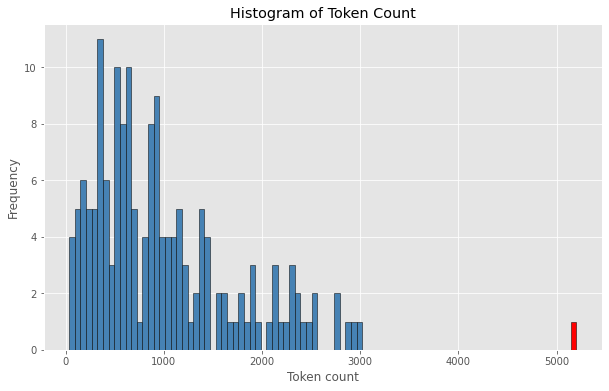

In [33]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6)) # Make it 14x7 inch
#plt.hist(tokens, bins=90, ,  ec="black", color = "steelblue")
n, bins, patches = plt.hist(tokens, bins=90,linewidth=0.5, ec="black" ,color='steelblue')
patches[89].set_fc('r') # the last is 
plt.title('Histogram of Token Count') 
plt.xlabel('Token count') 
plt.ylabel('Frequency') 
plt.savefig('images/token_count_hist_redbar.png')
plt.show()

In [42]:
short_docs = [i for i in dataset_docs if num_tokens_from_string(i, "cl100k_base") > 5000]

## Visualize Embeddings

In [12]:
from umap import UMAP
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

In [13]:
# Load embeddings
dataset_embs = np.array(dataset_data['embeddings'])

In [34]:
# Reduce dimensionality of embeddings
umap_fit = UMAP(n_neighbors=10, n_components=2, min_dist=0.1, metric='cosine').fit(dataset_embs)
projections = umap_fit.transform(dataset_embs)

In [35]:
import pylab as plt

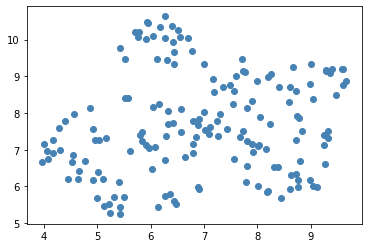

In [36]:
plt.scatter(projections[:, 0],projections[:, 1],color='steelblue')
plt.savefig("images/umap_10neig_2cmp.jpeg")
#plt.scatter(X,Y2,color='g')
plt.show()

In [39]:
# train/test

In [53]:
train_set = load_json("data/processed/train_set.json")
# Selecting the ids only
train_ids = [i['trial_id'] for i in train_set['ids']]
# Get the documents for the dataset ids
train_data = trials.get(ids=train_ids, include = ['documents', 'embeddings'])
train_embeddings = train_data['embeddings']

In [ ]:
train_set = load_json("data/processed/t_set.json")
# Selecting the ids only
train_ids = [i['trial_id'] for i in train_set['ids']]
# Get the documents for the dataset ids
train_data = trials.get(ids=train_ids, include = ['documents', 'embeddings'])
train_embeddings = train_data['embeddings']

In [54]:
train_em = umap_fit.transform(train_embeddings)

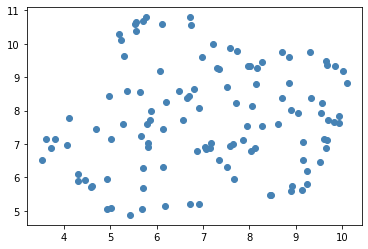

In [55]:
plt.scatter(train_em[:, 0],train_em[:, 1],color='steelblue')